1. 퍼셉트론 Forward : z = X @ W + b -> 신경망의 가장 기본 단위

In [2]:
import numpy as np

np.set_printoptions(suppress=True, precision=4) # 지수 아닌 일반 소수 4자리로 표시
rng = np.random.default_rng(0)

# 데이터 준비 (배치 입력)
N, D = 5, 3 # 샘플 수, 특성 수
X = rng.normal(0.0, 1.0, size=(N, D))
W = rng.normal(0.0, 1.0, size=(D, 1))
b = 0.5

print(X.shape, W.shape, b)
print(X)
print(W)

(5, 3) (3, 1) 0.5
[[ 0.1257 -0.1321  0.6404]
 [ 0.1049 -0.5357  0.3616]
 [ 1.304   0.9471 -0.7037]
 [-1.2654 -0.6233  0.0413]
 [-2.325  -0.2188 -1.2459]]
[[-0.7323]
 [-0.5443]
 [-0.3163]]


In [3]:
# Forward
z = X @ W + b
print(z.shape)
print(z)

(5, 1)
[[ 0.2773]
 [ 0.6004]
 [-0.7477]
 [ 1.7528]
 [ 2.7157]]


In [4]:
# 검증

# 의도한 차원인지 확인 (문제 빨리 찾기)
assert X.ndim == 2 and X.shape == (N, D)
assert W.ndim == 2 and W.shape == (D, 1)
assert np.isscalar(b)
assert z.ndim == 2 and z.shape == (N, 1)

# 필요 시 1차원으로 평탄화
z_1d = z.ravel() # (N, 1) -> (N,)
print(z_1d.shape)

print("Checked")

(5,)
Checked


In [5]:
"""
활성화 함수
- step : 기준 넘으면 1, 아니면 0 (이진판단)
- sigmoid : 출력 0~1 사이 (확률해석)
- ReLU : 음수는 0, 양수는 그대로 (심층신경망 기본)
"""

def step(x):
  return (x>=0).astype(np.int32)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

y_step = step(z)
y_sigm = sigmoid(z)
y_relu = relu(z)

print("y_step:", y_step.ravel())
print("y_sigm:", y_sigm.ravel())
print("y_relu:", y_relu.ravel())

y_step: [1 1 0 1 1]
y_sigm: [0.5689 0.6457 0.3213 0.8523 0.9379]
y_relu: [0.2773 0.6004 0.     1.7528 2.7157]


In [6]:
# 단일 vs 배치

x_single = rng.normal(size=(D,))
z_single = x_single @ W.squeeze() + b # .squeeze() : 차원 1일 축 제거 => (D, 1) -> (D,)
                                      # 따랏 z_single은 스칼라
print(x_single.shape, float(z_single))

x_row = x_single.reshape(1, -1) # (1, 3)
z_row = x_row @ W + b
print(x_row.shape, z_row.shape)

# >> 단일/배치 모두 '특성 차원'만 맞추면 Forward 동일하게 동작

(3,) -0.3281653360658131
(1, 3) (1, 1)


In [7]:
# loop보다 벡터화 권장 (결과는 동일)
def forward(X, W, b):
  return X @ W + b

z_vec = forward(X, W, b)
assert np.allclose(z, z_vec) # 상대오차 허용치 rtol=1e-5, 절대오차 허용치 atol=1e-8
print("forward() 동치성 Checked")

forward() 동치성 Checked


미니 과제

In [8]:
# 샘플별 편향 b : scalar -> (N, 1)
b = rng.normal(0, 0.1, size=(N,1))
z = X @ W + b
print(b.shape, z.shape)
print(z)

(5, 1) (5, 1)
[[-0.0861]
 [ 0.0338]
 [-1.2126]
 [ 1.3431]
 [ 2.2251]]


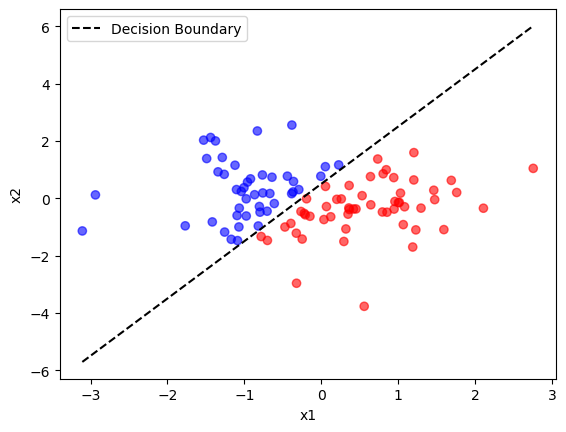

In [10]:
"""
결정경계 그리기 (D=2)

결정경계(Decision Boundary) : 분류 문제에서 클래스가 나뉘는 경계선(또는 면)
- 퍼셉트론/로지스틱 회귀 z = X @ W + b에서 z=0일때, 즉 X @ W + b = 0 인 부분이 결정경계

로지스틱 회귀 : 선형 결합 z = XW + b를 sigmoid에 넣어 0~1의 결과를 0.5 기준으로 나눠서 이진분류
              즉, 선형 모델 + 시그모이드 = 확률 기반 이진 분류기
"""
import matplotlib.pyplot as plt

# 샘플링 (D=2)
X = rng.normal(size=(100, 2)) # ([x1], [x2])

# 임의의 가중치, bias 고정
W = np.array([[2.0], [-1.0]]) # (2, 1) => [[W1], [W2]] -- (2,)로 해도 브로드캐스팅되어 결과 같음. 신경망 수학 표기와 더 잘맞으므로 (2,1)로 사용
b = 0.5

# z = X @ W + b
z = X @ W + b
y = (z >= 0).astype(int)

# 경계선: W1*x1 + W2*x2 + b = 0
# 그래프 그리기 위해 y = x + ~ 식으로 변경 (x2를 y, x1을 x로 가정)
# 따라서, x2 = -(W1/W2)*x1 - b/W2
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
x2 = -(W[0]/W[1])*x1 - b/W[1]

plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr", alpha=0.6)
plt.plot(x1, x2, "k--", label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [12]:
# step/sigmoid/ReLU 비교
def step(x): return (x>=0).astype(int)
def sigmoid(x): return 1/(1+np.exp(-x))
def relu(x): return np.maximum(0, x)

z_sample = np.array([[-2.0], [-0.5], [0.0], [0.5], [2.0]])

table = np.concatenate([ # np.concatenate() : 여러 배열을 하나로 이어붙이기
  z_sample,
  step(z_sample),
  sigmoid(z_sample),
  relu(z_sample)
], axis=1) # 열 방향(옆)

import pandas as pd
df = pd.DataFrame(table, columns=["z", "step(x)", "sigmoid(x)", "relu(x)"])
print(df)

     z  step(x)  sigmoid(x)  relu(x)
0 -2.0      0.0    0.119203      0.0
1 -0.5      0.0    0.377541      0.0
2  0.0      1.0    0.500000      0.0
3  0.5      1.0    0.622459      0.5
4  2.0      1.0    0.880797      2.0
